#  제 9강 차원 축소(Dimension Reduction)
# 주성분 분석(Principal Component Analysis)

- 비지도학습 알고리즘
- 차원축소 알고리즘(dimensionality reduction algorithm)
- 활용분야는 visualization, noise filtering, feature extraction and engineering

In [73]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [74]:
from IPython.display import Image
width=700; height=500

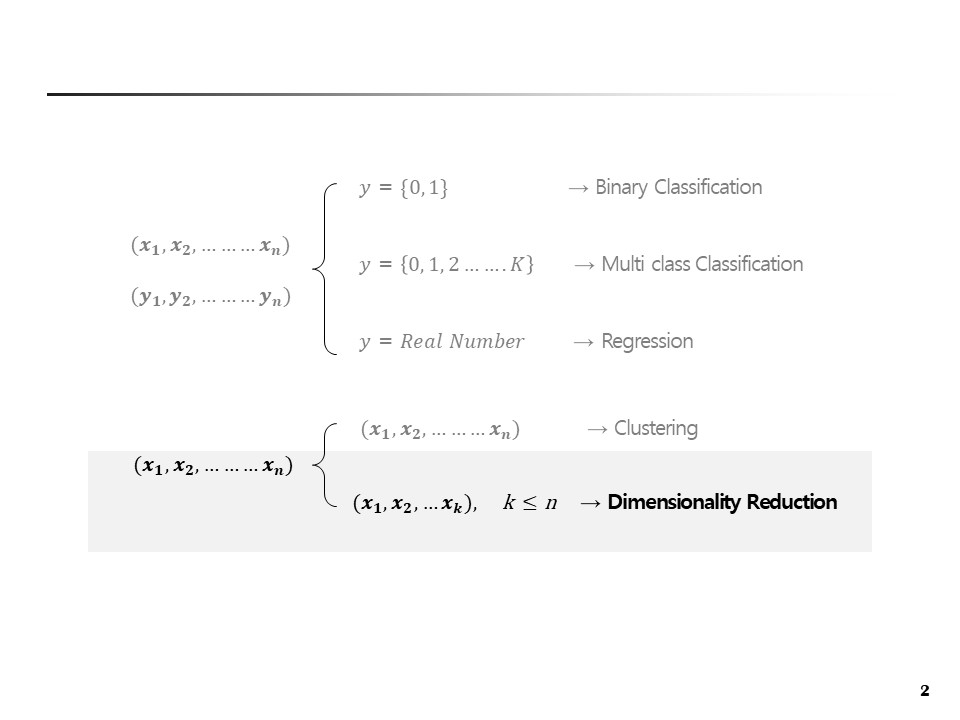

In [75]:
Image(filename='../image/pca/슬라이드2.jpg', width=width, height=height)

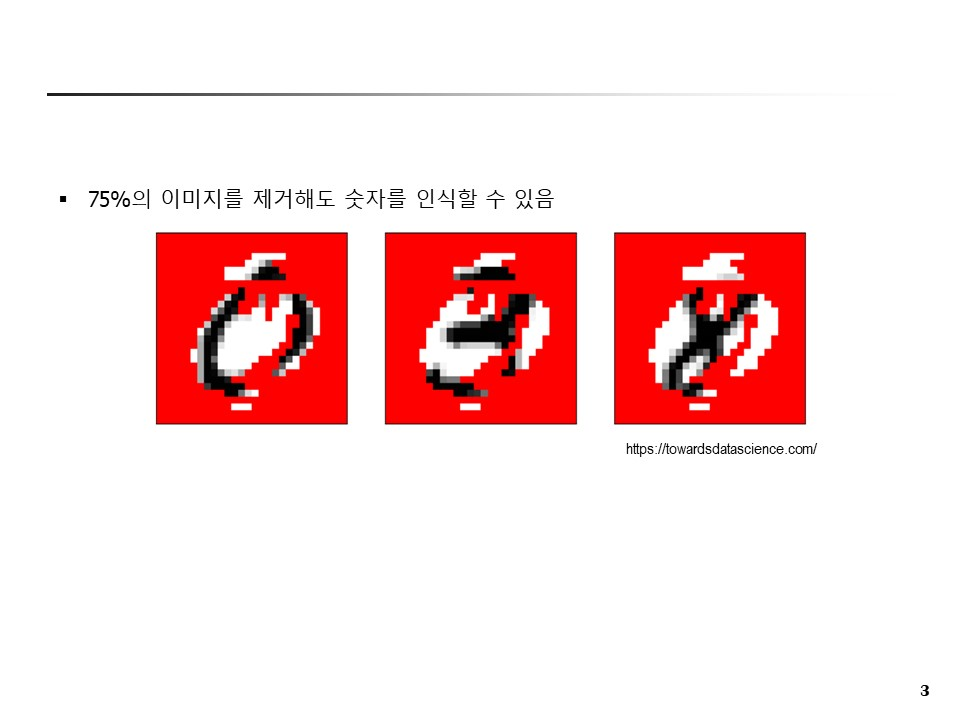

In [76]:
Image(filename='../image/pca/슬라이드3.jpg', width=width, height=height)

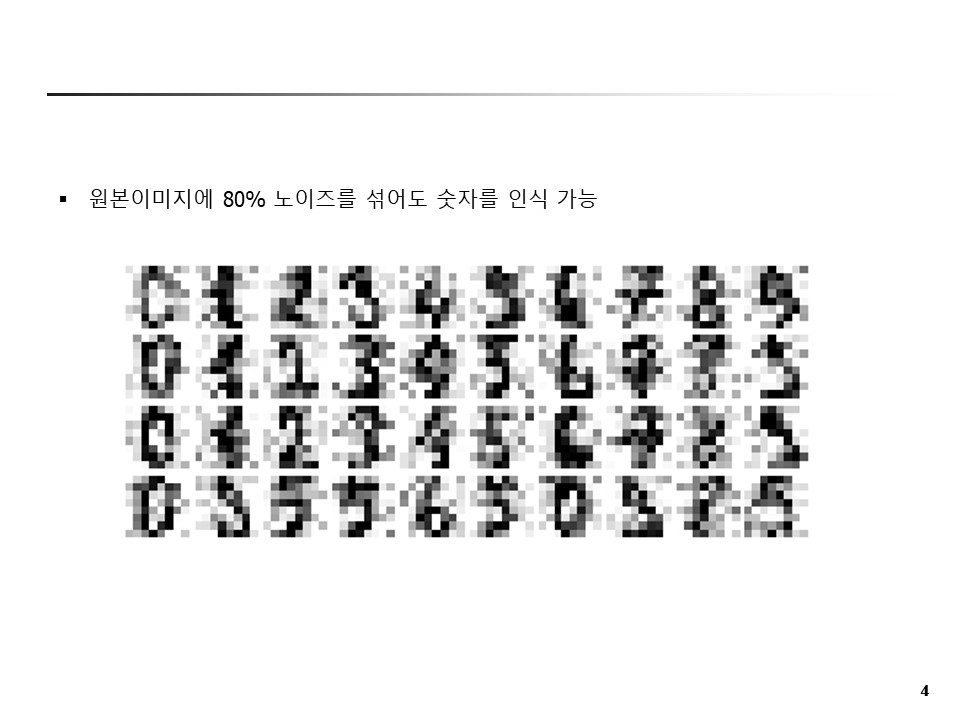

In [77]:
Image(filename='../image/pca/슬라이드4.jpg', width=width, height=height)

## 1. 차원의 저주

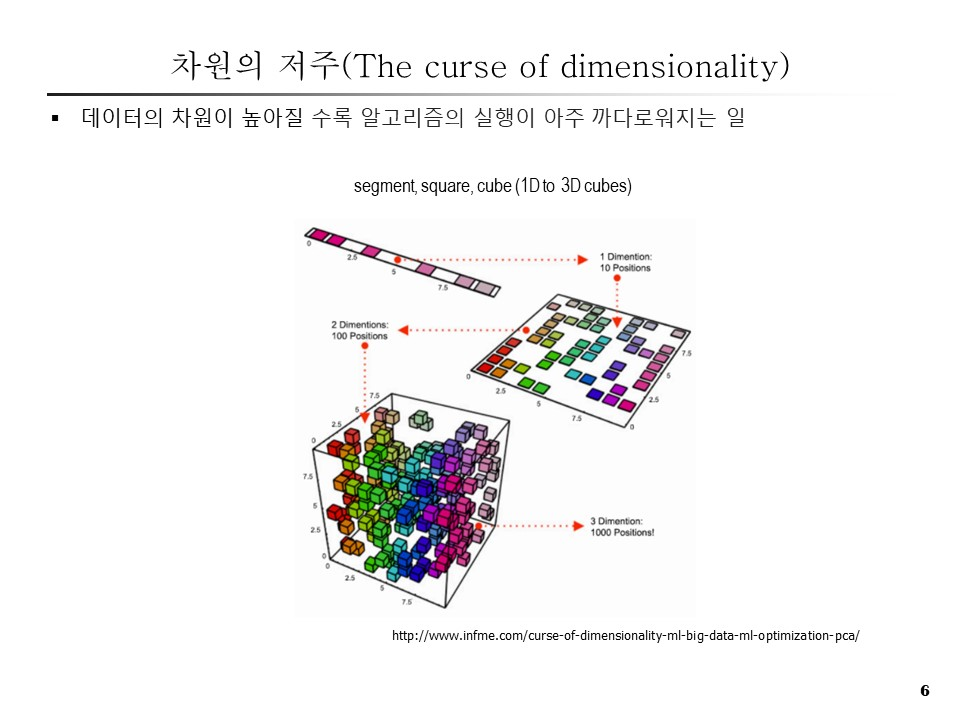

In [78]:
Image(filename='../image/pca/슬라이드6.jpg', width=width, height=height)

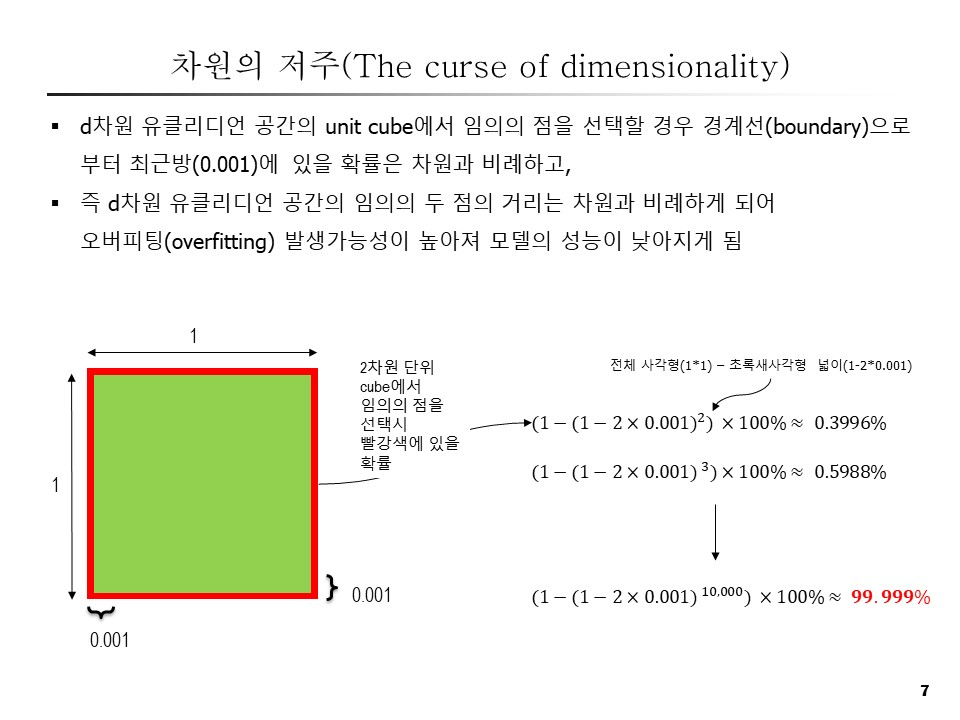

In [79]:
Image(filename='../image/pca/슬라이드7.jpg', width=width, height=height)

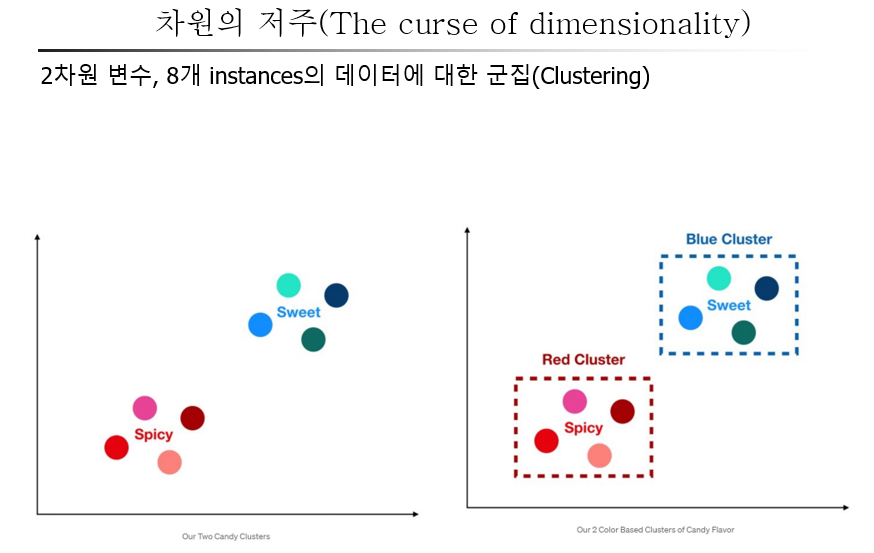

In [80]:
Image(filename='../image/pca/pca100.png', width=width, height=height)

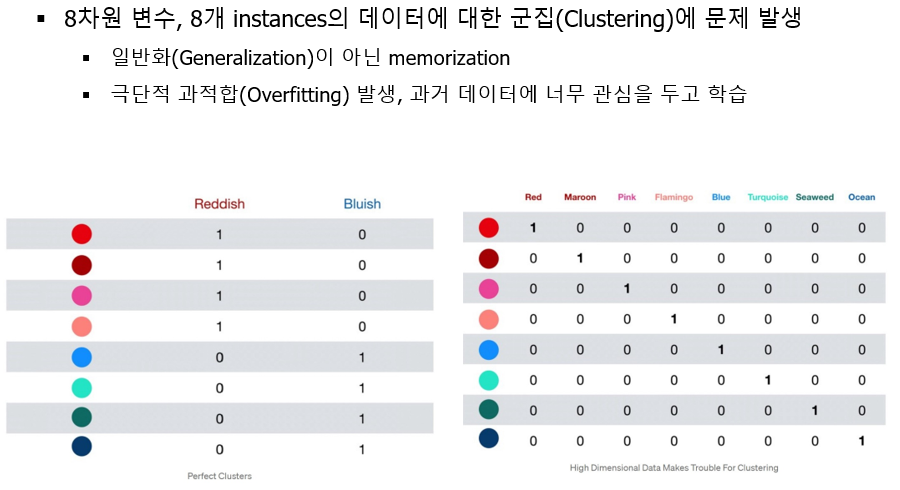

In [81]:
Image(filename='../image/pca/pca200.png', width=width, height=height)

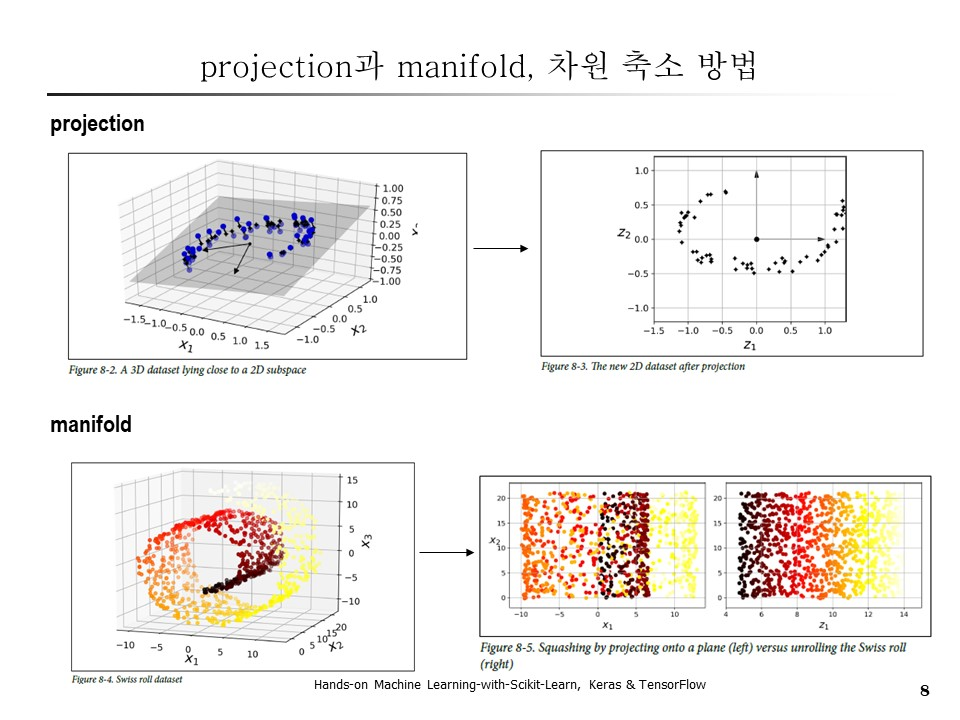

In [82]:
Image(filename='../image/pca/슬라이드8.jpg', width=width, height=height)

## 2. 주성분 개념

- 2차원의 200개 무작위 샘플

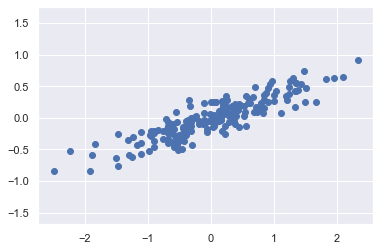

In [83]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

Scikit-Learn's ``PCA`` estimator를 사용

In [84]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

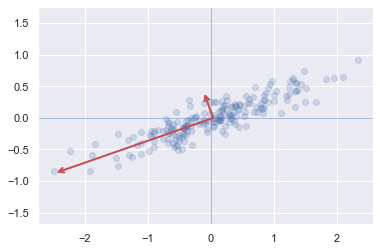

In [85]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2, color='r',
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axvline(0, linewidth=0.5); plt.axhline(0, linewidth=0.5)
plt.axis('equal');

##### 원래 데이터의 기저벡터(base vector)인 (1,0), (0,1)에서 관측된 x1, x2의 분산은 

  * 새로운 주성분(principal components) 벡터(화살표)에서 주성분 1과 2에 의해 표현될 수 있고(*principal axes*으로 자료 변환)
  * 원래 데이터의 총변동량(원래 데이터의 평균조정된 데이터의 내적(공분산)의 trace(x1, x1의 분산의 합))의 
  * 77%를 주성분 1은 76%, 1%를 각각 설명한다.


##### 즉 원래데이터는 새로운 기저벡터인 주성분벡터에서 projection(data representation, transformation)이 되었다.
* The transformation from data axes to principal axes)
   * affine transformation, which is composed of a translation, rotation, and uniform scaling.

<font color='red'> 주성분(components) 행렬은 2개의 직교벡터 (-0.9444, -0.3286)과 (-0.3286, 0.9444)로 구성

In [86]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


<font color='red'> 주성분 행렬은 직교행렬(Orthogonal matrix)로 직교행렬의 내적은 Identity 행렬

In [87]:
pca.components_.T@pca.components_

array([[ 1.00000000e+00, -1.55842306e-17],
       [-1.55842306e-17,  1.00000000e+00]])

<font color='red'> 주성분의 총변동량에 대한 설명비율(explained variance)은 2개 직교벡터의 화살표 크기

In [88]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


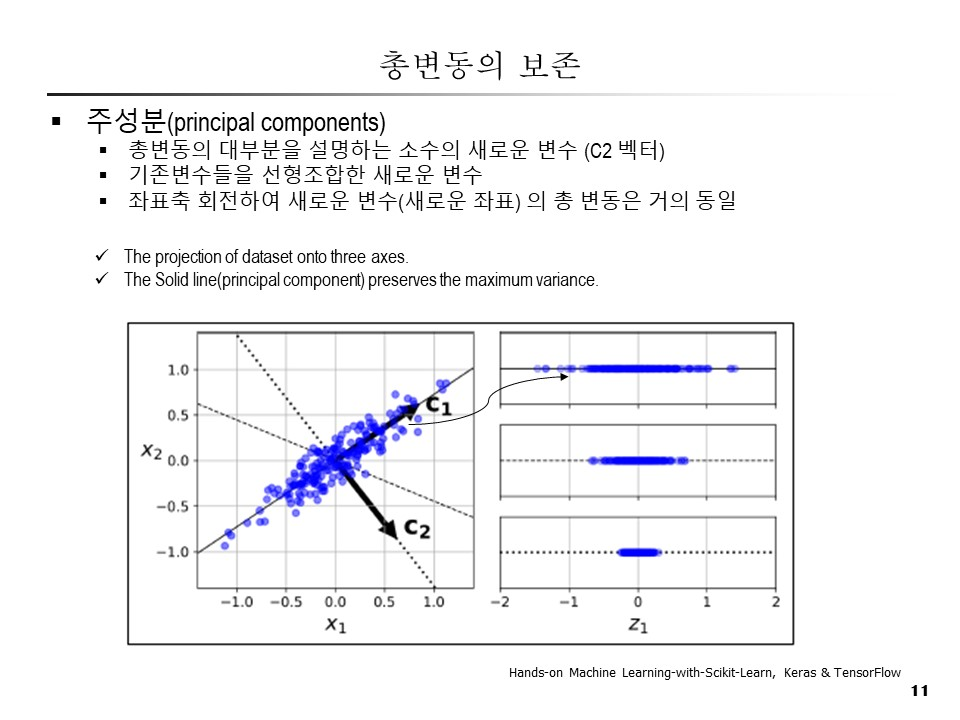

In [89]:
Image(filename='../image/pca/슬라이드11.jpg', width=width, height=height)

## 3. 차원축소(dimensionality reduction)와 복원

- PCA 알고리즘을 사용하여  high dimensionality 데이터를 저차원의 데이터로 빠르고 효율적으로 인식하여 원래데이터로 복원할 수있다.
  * 얼굴인식, 이미지복원 등 분야에서 활용
- Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

In [90]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

PCA(n_components=1)

original shape:    (200, 2)
transformed shape: (200, 1)


##### 2차원의 원자료를 1차원으로 축소한 주성분으로 inverse transform하여 원자료를 복원하여  원자료와 같이 표현

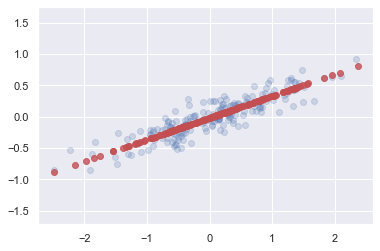

In [91]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8, color='r')
plt.axis('equal');

- 옅은 색은 원자료이고 붉은 색은 projected version임
- 총변동량은 가장 많이 설명하는 주성분으로 복원하면 거의 원자료와 비슷하게 됨

## 4 총변동량과 주성분 분석 이해
### 4.1 평균조정된 행렬 구성
- 평균조정된 자료(mean centering)와 표준공분산(standard covariance)

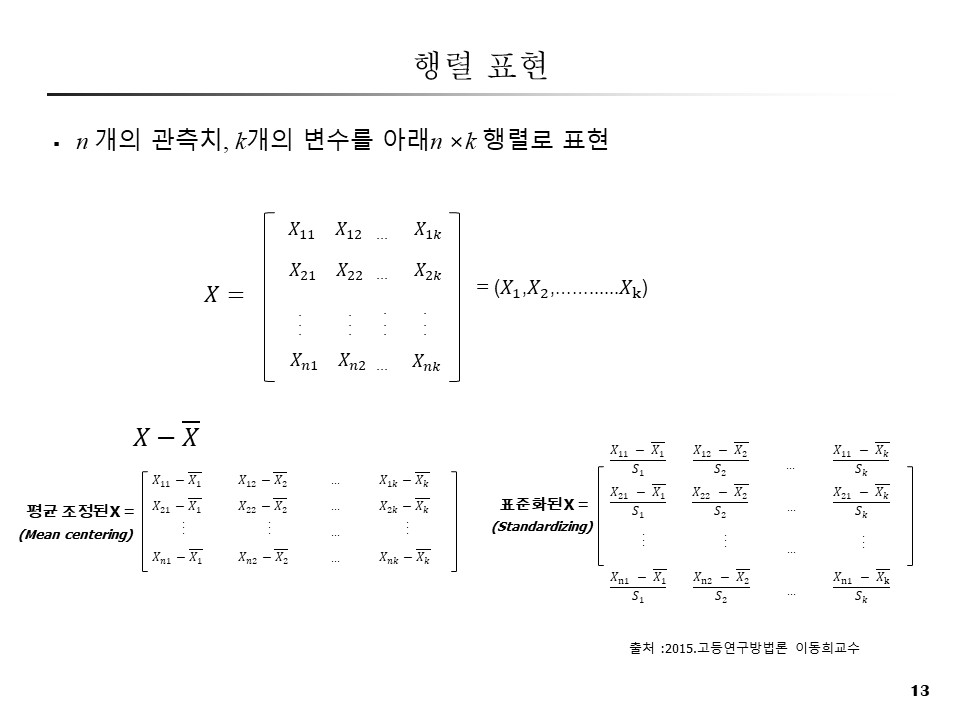

In [92]:
Image(filename='../image/pca/슬라이드13.jpg', width=width, height=height)

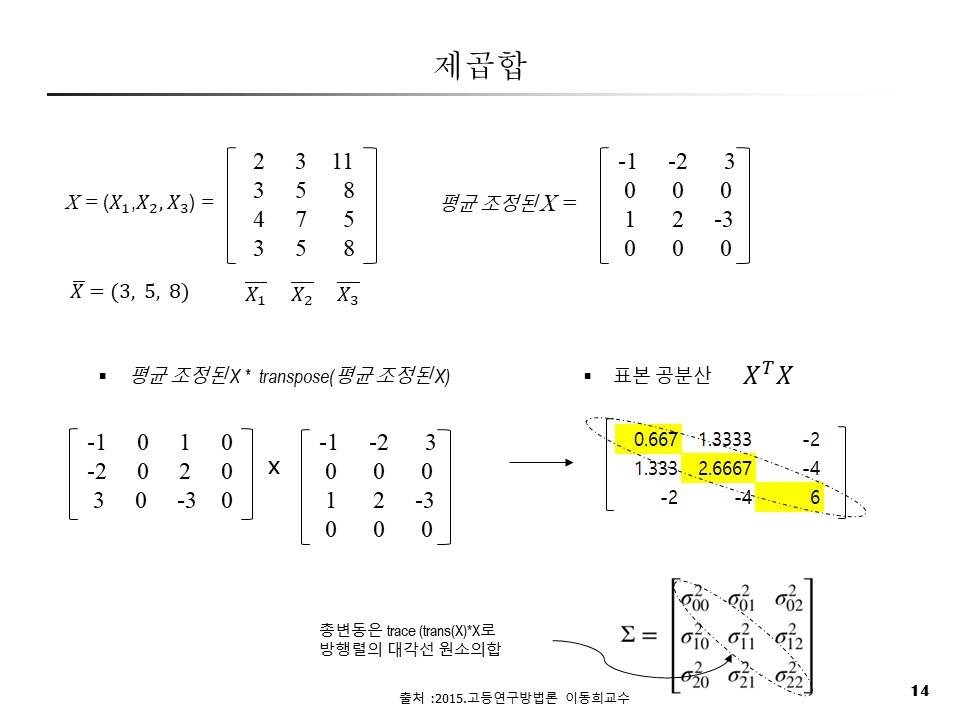

In [93]:
Image(filename='../image/pca/슬라이드14.jpg', width=width, height=height)

### 4.2 주성분 분석(PCA)과 시각화

In [94]:
X1 = np.array([int(num) for num in np.linspace(0, 15, 10)]).reshape(2,5)
X2 = np.array([int(num) for num in np.linspace(20, 55, 10)]).reshape(2,5)
X = np.concatenate((X1, X2))
X

array([[ 0,  1,  3,  5,  6],
       [ 8, 10, 11, 13, 15],
       [20, 23, 27, 31, 35],
       [39, 43, 47, 51, 55]])

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X) # 평균조정된 X
print(f'평균: {X_scaled.mean().round(2)}, 표준펀차: {X_scaled.std()}')

평균: 0.0, 표준펀차: 1.0


In [96]:
np.dot(X_scaled.T, X_scaled).round(2) # X_scaled.T@X_scaled
print(f'총변동량은: {np.trace(np.dot(X_scaled.T, X_scaled))}')

array([[4.  , 4.  , 3.99, 3.99, 3.98],
       [4.  , 4.  , 4.  , 3.99, 3.98],
       [3.99, 4.  , 4.  , 4.  , 3.99],
       [3.99, 3.99, 4.  , 4.  , 4.  ],
       [3.98, 3.98, 3.99, 4.  , 4.  ]])

총변동량은: 20.0


In [97]:
plt.rcParams['font.family']='Malgun Gothic'
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 0, '주성분 개 수')

Text(0, 0.5, '총변동량 누적 설명 비율')

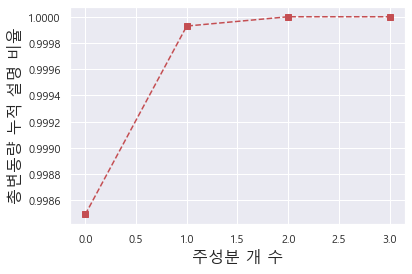

In [98]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'rs--')
plt.xlabel('주성분 개 수', fontsize='16')
plt.ylabel('총변동량 누적 설명 비율', fontsize='16')

In [99]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print('총변동량 설명비율 (%) :', np.round(pca.explained_variance_ratio_*100, 2))

PCA(n_components=2)

총변동량 설명비율 (%) : [99.85  0.14]


In [100]:
(X_pca.T@X_pca).round(2)
print(f'공분산은: {np.trace(np.dot(X_pca.T, X_pca))}')
(np.trace(np.dot(X_pca.T, X_pca))/20)*100

array([[19.97,  0.  ],
       [ 0.  ,  0.03]])

공분산은: 19.998582676597607


99.99291338298804

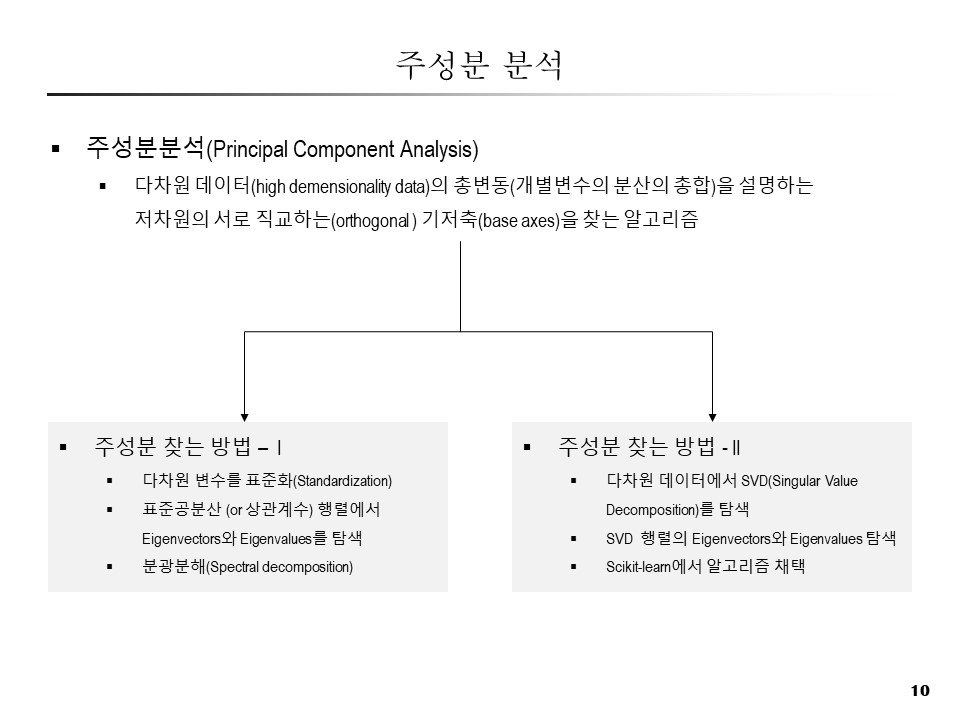

In [101]:
Image(filename='../image/pca/슬라이드10.jpg', width=width, height=height)

## 5. 선형대수를 이용하여 주성분 구하는 방법

- 주성분 분석을 위한 알고리즘 소개

   * (1) 분광 분해(Spectral decomposition) : 요인분석(factor analysis)
   * (2) 특이치 분해(Singular Value Decomposition) : Scikit-learn API
   * (3) 축소된 특이치 분해(Truncated SVD)

### 5.1 분광분해(Spectral decomposition)
### Eigendecomposition of a matrix
https://en.wikipedia.org/wiki/Eigendecomposition_of_a_matrix
   * 2차원을 2차원으로 축소 통계모델의 주성분분석, 요인분석(Factor analysis)에 사용하는 분광분석
   * Scikit-learn의 알고리즘은 SVD(Singular Vector Decomposition)알고리즘을 사용

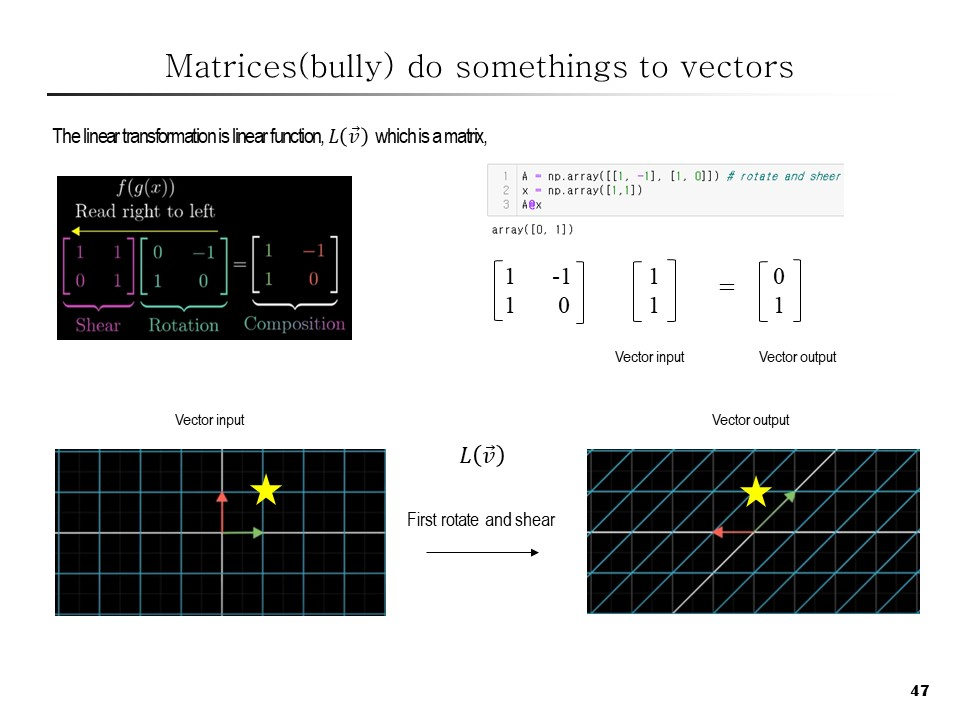

In [102]:
Image(filename='../image/pca/슬라이드47.jpg', width=width, height=height)

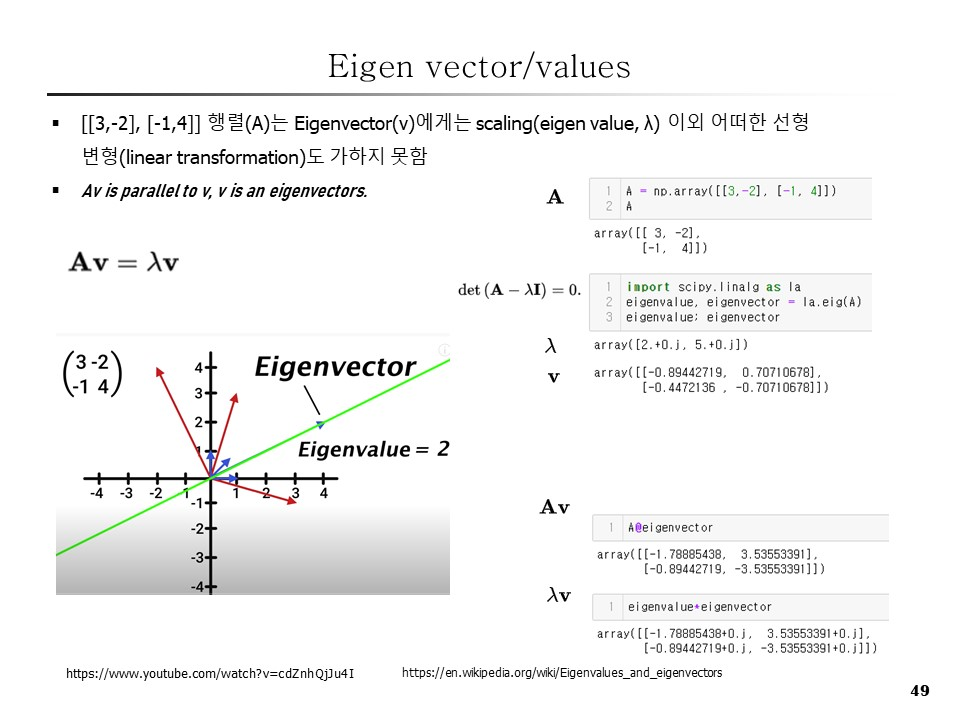

In [103]:
Image(filename='../image/pca/슬라이드49.jpg', width=width, height=height)

https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors

In [104]:
A = pd.DataFrame(np.array([[14,8], [12,5], [10,4], [9,6], [5,2]]))
A

,0,1
0,14,8
1,12,5
2,10,4
3,9,6
4,5,2


* 평균조정된 X

In [105]:
X = A - A.mean()
X

,0,1
0,4.0,3.0
1,2.0,0.0
2,0.0,-1.0
3,-1.0,1.0
4,-5.0,-3.0


* 총 변동량

In [106]:
X.values.T@X.values
(X**2).sum(0).sum()
np.trace(X.values.T@X.values)

array([[46., 26.],
       [26., 20.]])

66.0

66.0

* 공분산의 eigen vector(고유행렬)와 eigen value(고유값); eigen은 정방형(sauare matrix)에서만 도출

In [107]:
eigen_value, eigen_vector = np.linalg.eig(X.values.T@X.values)
eigen_vector; eigen_value
np.diag(eigen_value) # eigen value의 대각행렬 생성

array([[ 0.85065081, -0.52573111],
       [ 0.52573111,  0.85065081]])

array([62.06888371,  3.93111629])

array([[62.06888371,  0.        ],
       [ 0.        ,  3.93111629]])

#### X(공분산)에 대한 고유값분해(eigenvalue decomposition)

공분산의 아이겐분해(분광분해)

In [108]:
X.values.T@X.values
eigen_vector@np.diag(eigen_value)@eigen_vector.T

array([[46., 26.],
       [26., 20.]])

array([[46., 26.],
       [26., 20.]])

* 주성분으로 표현된 인스턴스는 행렬 X와 eigenvector의 내적으로 계산

In [109]:
T = X@eigen_vector
T
np.trace(T.T @ T)

,0,1
0,4.979797,0.449028
1,1.701302,-1.051462
2,-0.525731,-0.850651
3,-0.324920,1.376382
4,-5.830447,0.076703


65.99999999999997

### 그래프 시각화

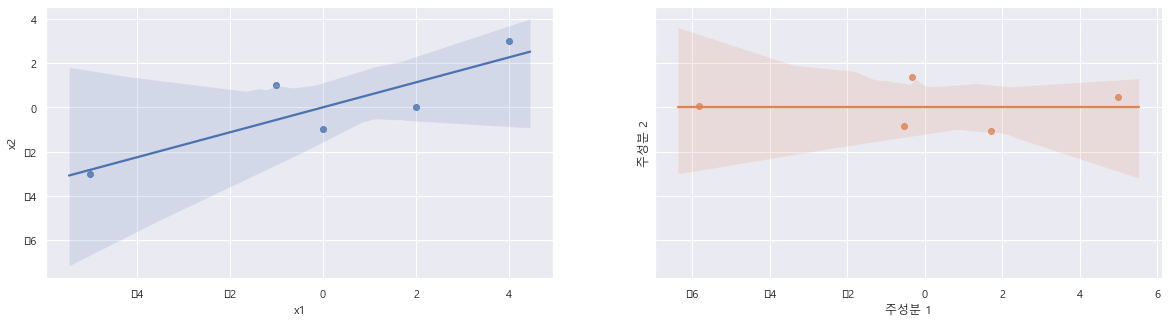

In [110]:
T.columns = ['주성분 1', '주성분 2']; X.columns = ['x1', 'x2']
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(20,5))
sns.regplot(x=X['x1'], y=X['x2'], ax=ax1)
sns.regplot(x=T['주성분 1'], y=T['주성분 2'], ax=ax2)

### 5.2 특이치 분해(Full SVD)

- A = u x s x vh
- 분광분해를 일반화한 특이값 분해 (m x n) 직사각형 행렬에 적용

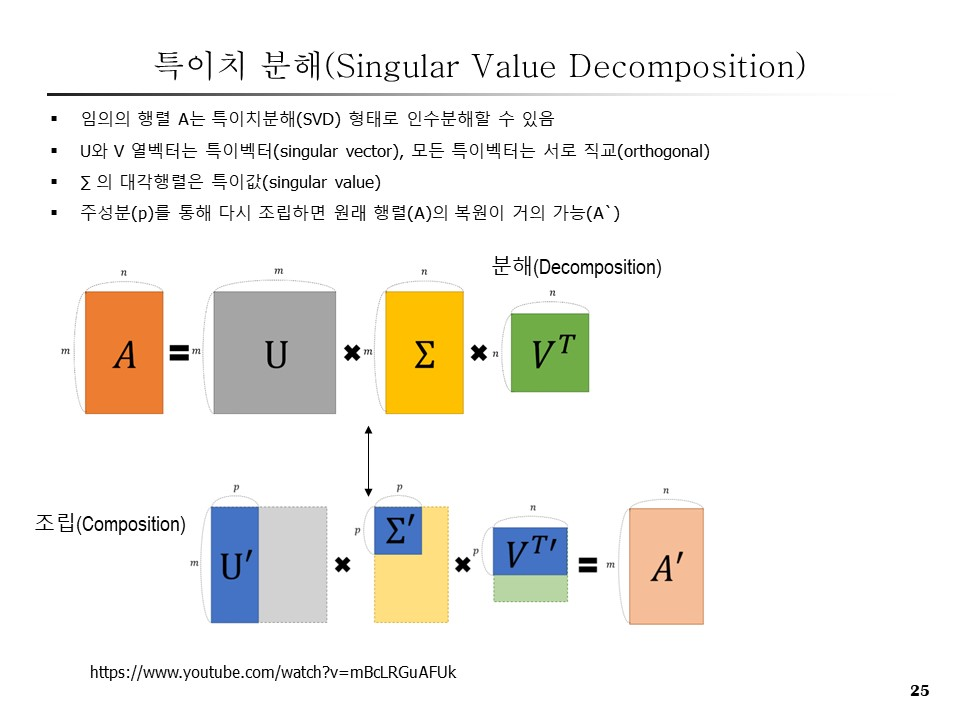

In [111]:
Image(filename='../image/pca/슬라이드25.jpg', width=width, height=height)

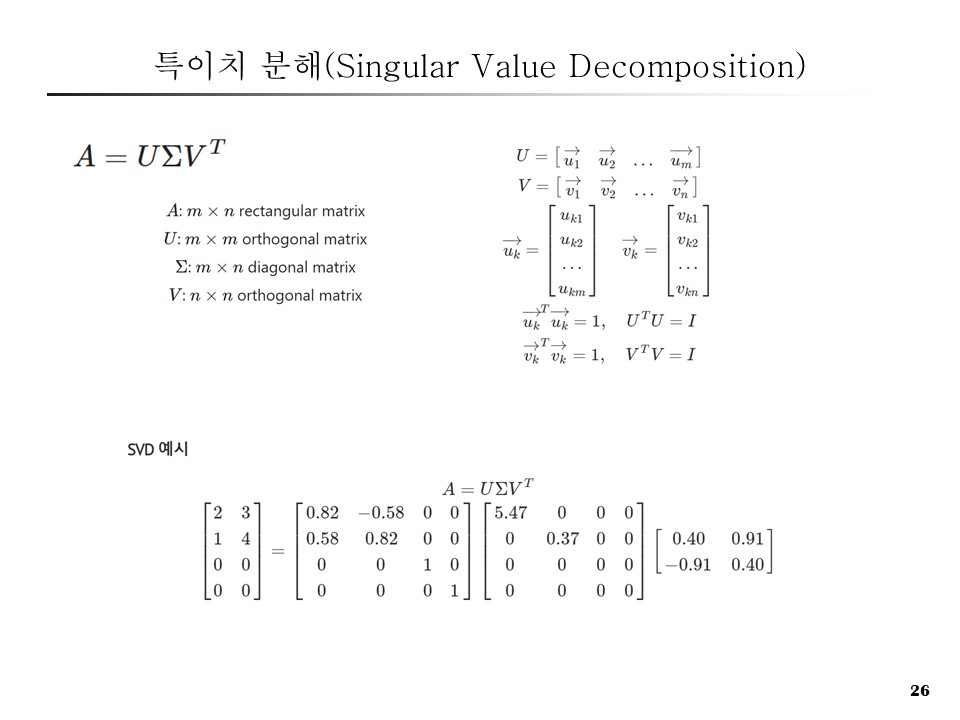

In [112]:
Image(filename='../image/pca/슬라이드26.jpg', width=width, height=height)

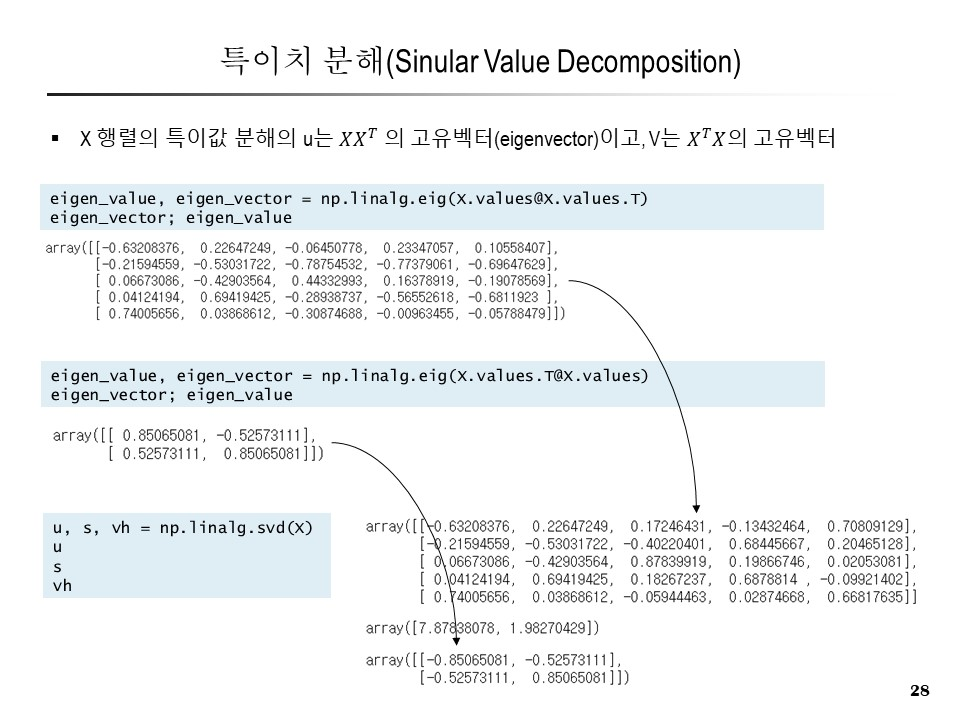

In [113]:
Image(filename='../image/pca/슬라이드28.jpg', width=width, height=height)

In [114]:
np.random.seed(12)
A = np.random.randn(5, 3)
np.shape(A)
A

(5, 3)

array([[ 0.47298583, -0.68142588,  0.2424395 ],
       [-1.70073563,  0.75314283, -1.53472134],
       [ 0.00512708, -0.12022767, -0.80698188],
       [ 2.87181939, -0.59782292,  0.47245699],
       [ 1.09595612, -1.2151688 ,  1.34235637]])

In [115]:
u, s, vh = np.linalg.svd(A, full_matrices=False)

In [116]:
print("u:" + str(u.shape)) 
print("s:" + str(s.shape))
print("s:" + str(np.diag(s).shape)) # 특이값을 대각행렬에 삽입
print("vh:" + str(vh.shape))

u:(5, 3)
s:(3,)
s:(3, 3)
vh:(3, 3)


u.T@ u, vh.T@vh, 특이행렬의 직교행렬로 곱은 Identity matrix이다.

In [117]:
u.T@ u
vh.T@vh

array([[ 1.00000000e+00, -9.47837703e-17,  5.39109866e-17],
       [-9.47837703e-17,  1.00000000e+00,  9.08844981e-17],
       [ 5.39109866e-17,  9.08844981e-17,  1.00000000e+00]])

array([[ 1.00000000e+00, -4.46234842e-17,  1.47009539e-16],
       [-4.46234842e-17,  1.00000000e+00,  3.32473886e-17],
       [ 1.47009539e-16,  3.32473886e-17,  1.00000000e+00]])

In [118]:
A
np.dot(np.dot(u,np.diag(s)), vh)
np.allclose(A, np.dot(np.dot(u,np.diag(s)), vh))

array([[ 0.47298583, -0.68142588,  0.2424395 ],
       [-1.70073563,  0.75314283, -1.53472134],
       [ 0.00512708, -0.12022767, -0.80698188],
       [ 2.87181939, -0.59782292,  0.47245699],
       [ 1.09595612, -1.2151688 ,  1.34235637]])

array([[ 0.47298583, -0.68142588,  0.2424395 ],
       [-1.70073563,  0.75314283, -1.53472134],
       [ 0.00512708, -0.12022767, -0.80698188],
       [ 2.87181939, -0.59782292,  0.47245699],
       [ 1.09595612, -1.2151688 ,  1.34235637]])

True

### 5.3 Truncated SVD

In [119]:
from sklearn.decomposition import TruncatedSVD

In [120]:
svd = TruncatedSVD(n_components=1)
svd.fit_transform(A)

array([[ 0.73822477],
       [-2.352253  ],
       [-0.31719707],
       [ 2.77740215],
       [ 1.93375815]])

## 6.  sklearn.decomposition.PCA
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

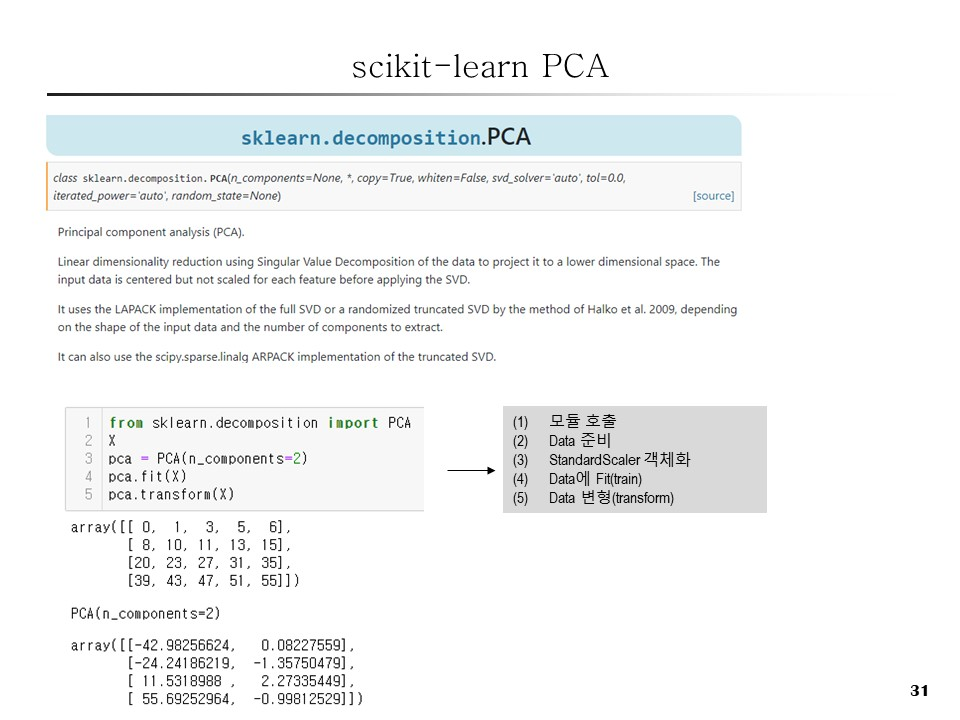

In [121]:
Image(filename='../image/pca/슬라이드31.jpg', width=width, height=height)

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

## 7. PCA의 의미 및 적용 사례
### 7.1 주성분의 의미

고차원 자료인 수기체 이미지에 PCA 적용

Recall what these components mean: the full data is a 64-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance.
Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions, and have done this in an unsupervised manner—that is, without reference to the labels.

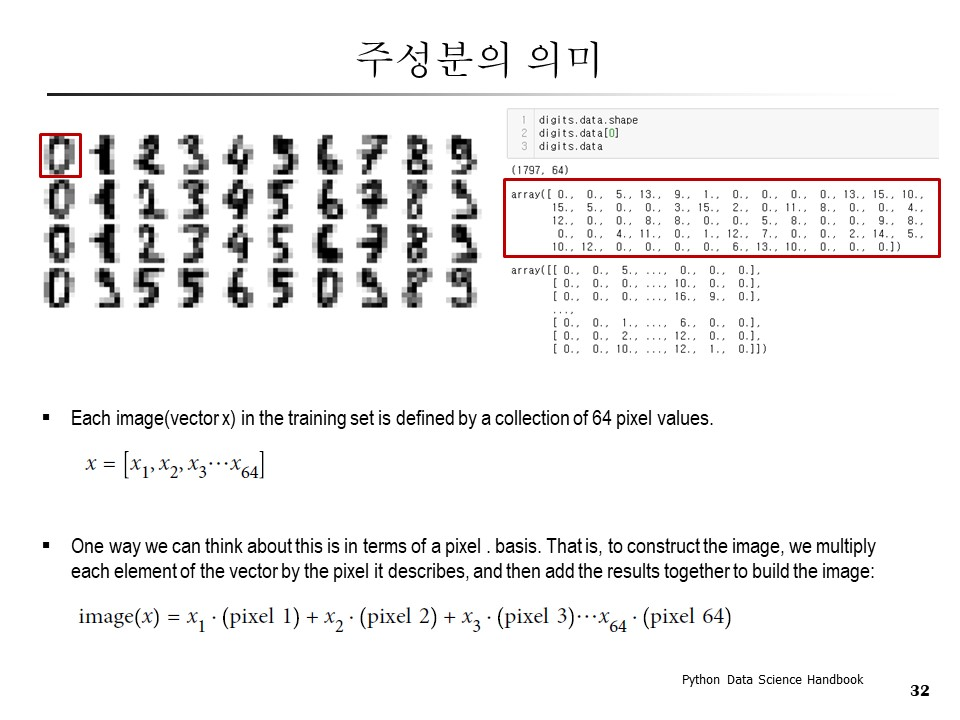

In [122]:
Image(filename='../image/pca/슬라이드32.jpg', width=width, height=height)

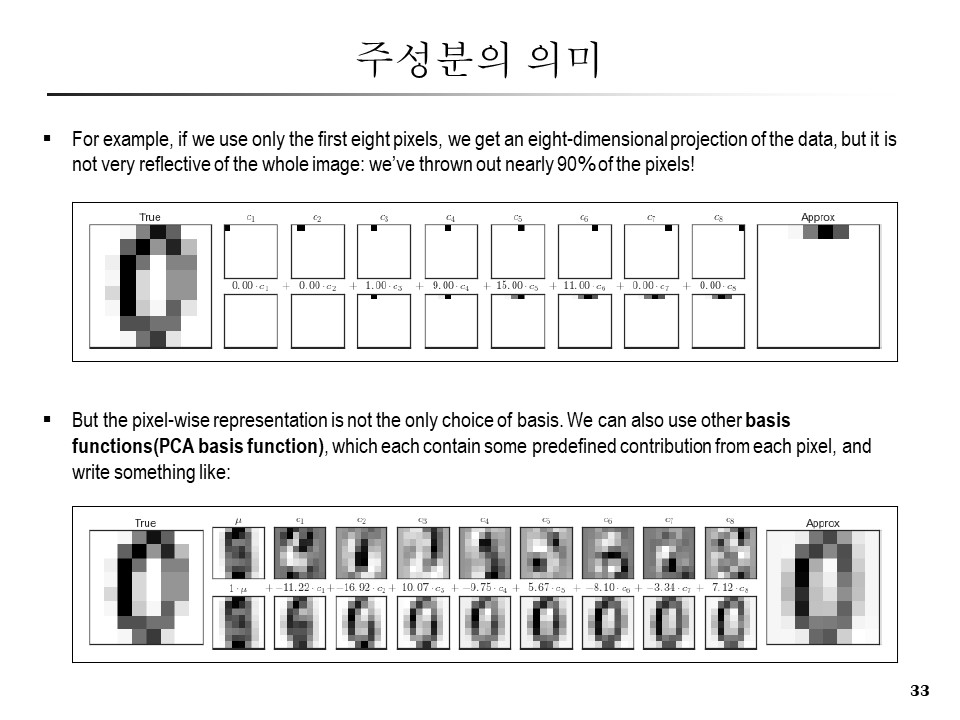

In [123]:
Image(filename='../image/pca/슬라이드33.jpg', width=width, height=height)

### 주성분의 의미

64차원의 벡터로 이루어진 원자료를
$$
x = [x_1, x_2, x_3 \cdots x_{64}]
$$

차원이 축소된 주성분으로 총 변동량을 대부분 설명이 가능하다. 64차원의 변수의 선형결합으로 원자료는 아래와 같이 표현

$$
{\rm image}(x) = x_1 \cdot{\rm (pixel~1)} + x_2 \cdot{\rm (pixel~2)} + x_3 \cdot{\rm (pixel~3)} \cdots x_{64} \cdot{\rm (pixel~64)}
$$

원자료의 90%를 표현할 수 있는 주성분(새로운 기저변수)

$$
image(x) = {\rm mean} + x_1 \cdot{\rm (basis~1)} + x_2 \cdot{\rm (basis~2)} + x_3 \cdot{\rm (basis~3)} \cdots
$$

PCA는 최적의 기저변수와 각 기저변수의 계수로 이루어진 함수를 찾는 과정(optimal basis functions)

#### 최적의 주성분 개수 구하기

총 누적 변동량(cumulative *explained variance ratio*)과 주성분의 개수:

### 7.2 PCA for visualization: Hand-written digits

In [144]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

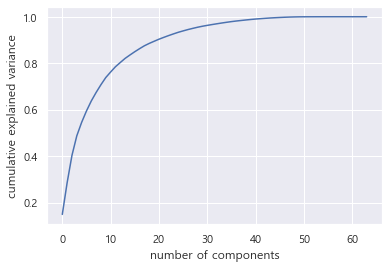

In [145]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

- 8×8 pixel images 자료, 총 64차원

In [146]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


In [147]:
projected

array([[ -1.259466  ,  21.27488249],
       [  7.9576102 , -20.76870259],
       [  6.99192341,  -9.9559831 ],
       ...,
       [ 10.80128251,  -6.96025369],
       [ -4.87208481,  12.42397781],
       [ -0.34438841,   6.36555355]])

2 개의 주성분으로 2차원 평면에서 이미지 기호(0~9) 확인

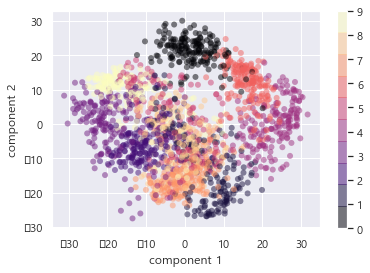

In [127]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('magma', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

원래 데이터(64 차원)에서 가장 큰 분산을 갖는 방향을 2개의 주성분에 의한 각 데이터 포인트의 투영
- 개념적으로 64 차원 공간에서 최적의 확장 및 회전 선형변환을 발견하여 2차원에서 거의 완벽하게 비지도 학습하여 구분에 성공

### 7.2 PCA as Noise Filtering

- 잡음(noise)의 영향보다 훨씬 큰 분산을 가진 주성분은 상대적으로 잡음의 영향을 받지 않고 주성분을 사용하여 데이터를 재구성하는 경우 우선적으로 신호를 유지하고 노이즈를 제거하게 됨

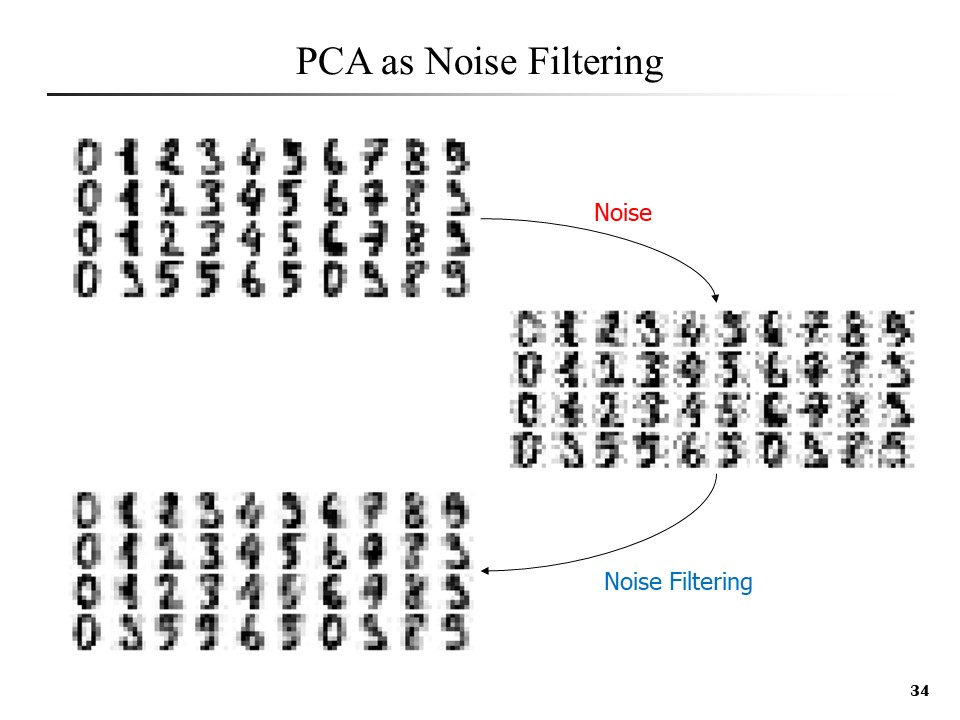

In [128]:
Image(filename='../image/pca/슬라이드34.jpg', width=width, height=height)

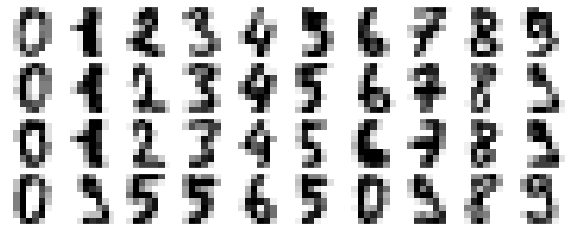

In [129]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

잡음(noise)를 발생시켜 데이터에 주입

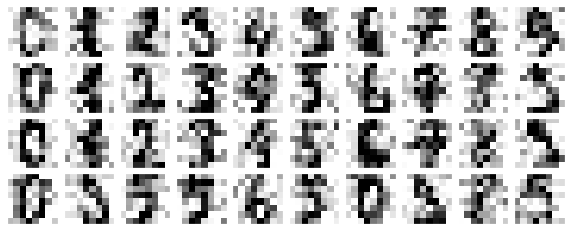

In [130]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

잡음이 있는 이미지는 손상되었지만 50% 총변동량을 갖는 주성분 개수 12개를 추출

In [131]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

주성분의 inverse of the transform으로 이미지를 filtering하여 데이터를 복원

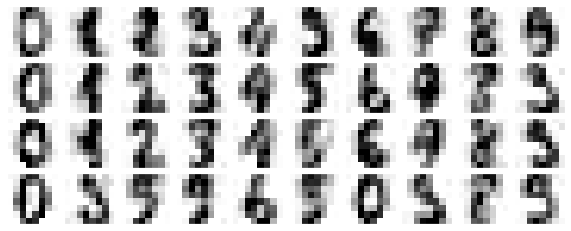

In [132]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

고차원 자료(very high-dimensional data)로 예측하는 대신 원자료의 총변동량을 대부분 설명하는 주성분으로 표현(representation)이 가능

## 7.7  Eigenfaces

총 150개의 주성분중에서 24개의 주성분(eigenvectors)을 살펴보면, 즉 24개의 "eigenfaces"

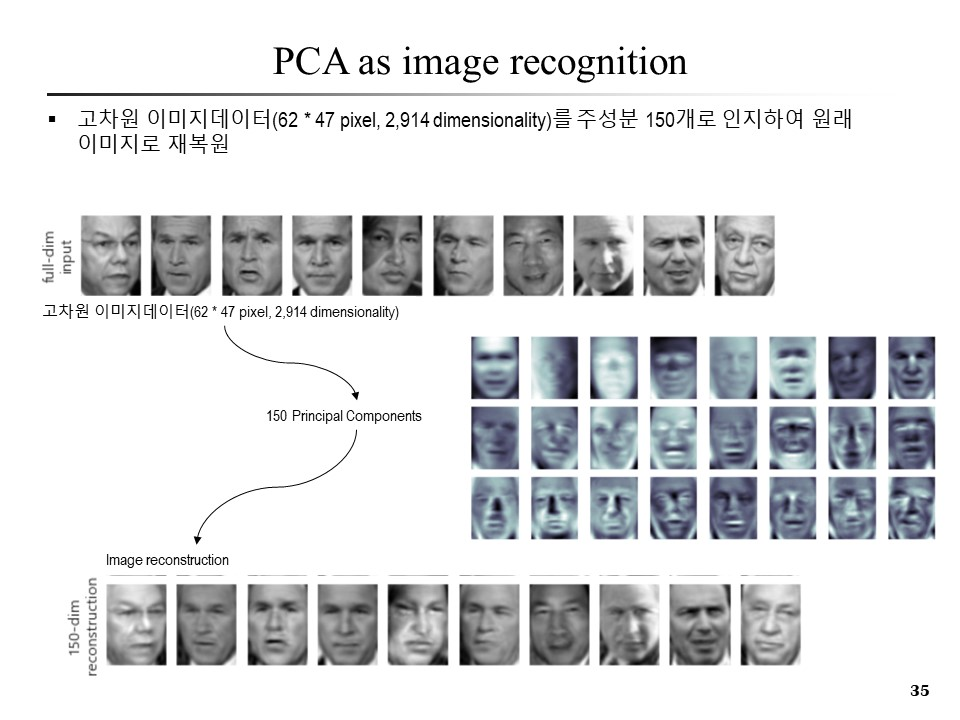

In [133]:
Image(filename='../image/pca/슬라이드35.jpg', width=width, height=height)

In [134]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [135]:
from sklearn.decomposition import PCA

In [136]:
from sklearn.decomposition import TruncatedSVD

In [137]:
#from sklearn.decomposition import RandomizedPCA
pca = TruncatedSVD(150)
pca.fit(faces.data)

TruncatedSVD(n_components=150)

In this case, it can be interesting to visualize the images associated with the first several principal components (these components are technically known as "eigenvectors,"
so these types of images are often called "eigenfaces").
As you can see in this figure, they are as creepy as they sound:

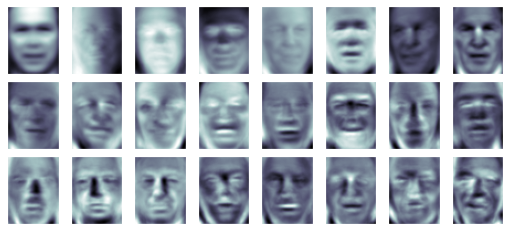

In [138]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

- 왼쪽 윗편은 주성분얼굴 : 얼굴에 비치는 빛의 각도
- 나머자 주성분얼굴 : 눈, 코, 입술

주성분 개수와 누적 총변동량

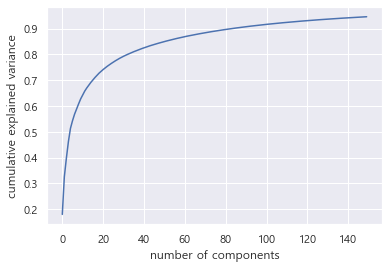

In [139]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

150개의 주성분으로 90%이상의 원자료 변동량을 설명하고 있어 주성분 150개로 원래 이미지를 복원 

In [140]:
# Compute the components and projected faces
pca = TruncatedSVD(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

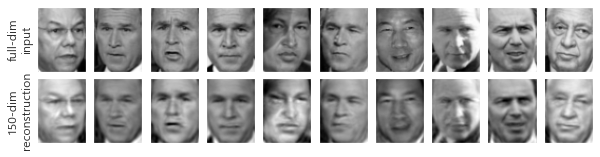

In [141]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

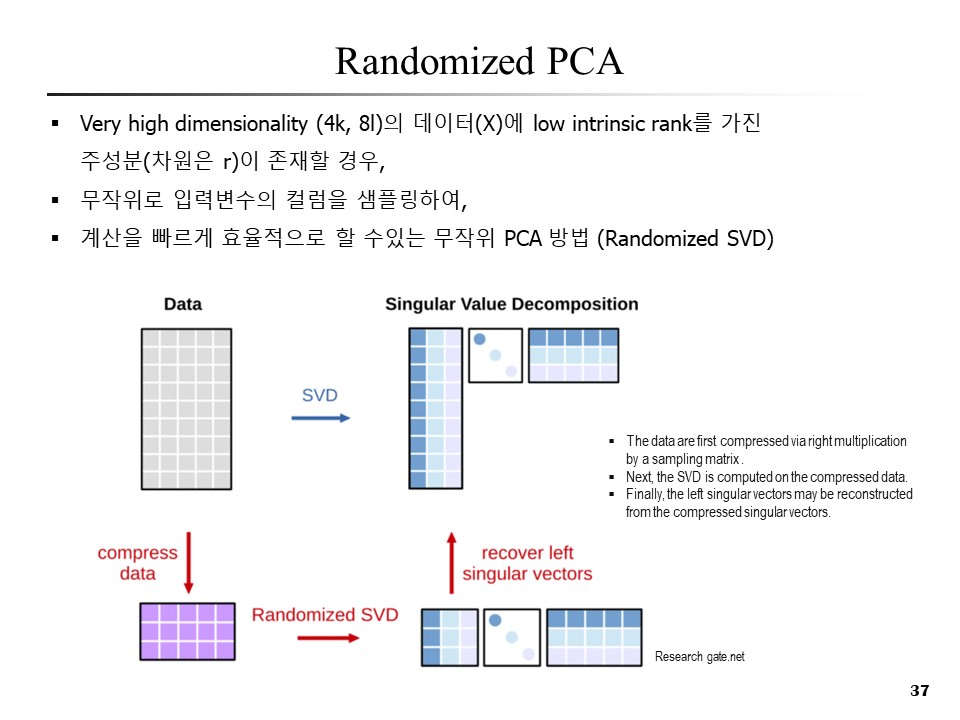

In [142]:
Image(filename='../image/pca/슬라이드37.jpg', width=width, height=height)

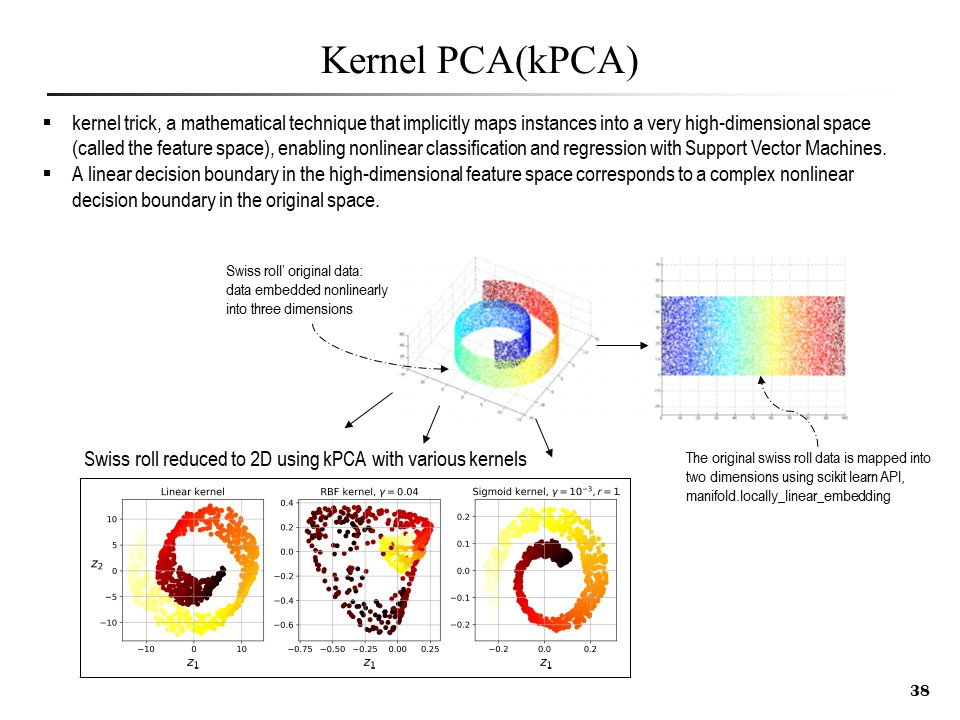

In [143]:
Image(filename='../image/pca/슬라이드38.jpg', width=width, height=height)

# END

## <font color='brown'> Decomposing signals in components (matrix factorization problems)
https://scikit-learn.org/stable/modules/decomposition.html#fa